# 介绍

在打击欺诈等非法活动的数据科学领域，一个最大的挑战通常是发现自己总是落后一步。你的模型是基于过去的数据训练的。如果用户想出了全新的欺诈方式，通常需要一段时间才能作出反应。等到你获取到关于这种新欺诈策略的数据并重新训练模型时，很多欺诈行为可能已经发生了。一个克服这一问题的方法是使用无监督机器学习，而不是监督学习。这种方法不需要事先有特定欺诈模式的示例就能进行预测。通常，这通过观察数据并识别突然出现的异常活动群体来实现。

XYZ公司是一家主要的信用卡公司，掌握着用户使用信用卡进行的所有交易信息。

设定了三个主要的任务，旨在优化信用卡公司的运营和安全措施。首先，希望能够识别出那些在数据集中从未超过每月信用卡限额的用户。这样做的目的是为了自动提升这些用户的信用额度，以鼓励更多的消费并提升客户满意度。你需要从交易数据中提取出这些用户的ID列表。

第二个任务是实现一个实时监控系统。一旦用户的消费超过了她的每月信用卡限额，系统需要立即触发警报通知用户。这要求你构建一个每天都能检测并返回超出信用限额用户列表的函数。此举能帮助用户更好地管理其财务，并防止因超支而产生的额外费用。

最后，鉴于欺诈行为对公司造成的巨大成本，特别强调了防范欺诈的重要性。要求你开发一个无监督学习算法，用于识别和标记所有看起来异常的交易，这些交易可能涉及欺诈，需要进一步的调查。这种算法将帮助公司及时发现和应对新的欺诈手段，从而减少潜在的经济损失。

# 导入数据集

导入常见的库：

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

导入数据集：

In [130]:
cc_info = pd.read_csv("./../dataset/10. credit_card/cc_info.csv")
cc_info.head()

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000


In [131]:
tran_info = pd.read_csv("./../dataset/10. credit_card/transactions.csv", parse_dates=['date'])
tran_info.head()

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719


简单的查看一下信息：

In [132]:
cc_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   credit_card        984 non-null    int64 
 1   city               984 non-null    object
 2   state              984 non-null    object
 3   zipcode            984 non-null    int64 
 4   credit_card_limit  984 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.6+ KB


 `cc_info` 数据集信息，这个数据集包含 984 条记录，并且具有以下五个字段：

1. **credit_card**: 表示信用卡号，数据类型为 `int64`，这个字段有 984 个非空值。
2. **city**: 表示信用卡持有者的城市，数据类型为 `object`，这个字段也有 984 个非空值。
3. **state**: 表示信用卡持有者所在的州，数据类型为 `object`，所有记录都是非空的。
4. **zipcode**: 表示信用卡持有者的邮编，数据类型为 `int64`，全部记录均为非空。
5. **credit_card_limit**: 表示信用卡的信用额度，数据类型为 `int64`，同样全部记录非空。

这个数据集为每个信用卡账户提供了基本的地理和信用额度信息，可以与交易数据结合使用，来实现各项任务，如监测信用额度使用情况，以及分析和识别异常交易模式。

In [133]:
tran_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   credit_card                294588 non-null  int64         
 1   date                       294588 non-null  datetime64[ns]
 2   transaction_dollar_amount  294588 non-null  float64       
 3   Long                       294588 non-null  float64       
 4   Lat                        294588 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 11.2 MB


`tran_info` 数据集包含了大约 294,588 条交易记录，具有以下五个字段：

1. **credit_card**: 表示信用卡号，数据类型为 `int64`，这个字段的每一条记录都是非空的。
2. **date**: 表示交易日期，数据类型为 `object`（可能是字符串格式的日期），所有记录都是非空的。
3. **transaction_dollar_amount**: 表示交易金额，数据类型为 `float64`，所有记录都非空。
4. **Long**: 表示交易地点的经度，数据类型为 `float64`，所有记录都非空。
5. **Lat**: 表示交易地点的纬度，数据类型为 `float64`，所有记录都非空。

这个数据集提供了每次交易的详细信息，包括信用卡号、交易日期、交易金额以及地理位置信息（经度和纬度）。这些信息将非常有用于分析交易模式、监测信用卡的使用情况，以及实现无监督学习算法来检测可能的欺诈行为。

# 数据处理

对两个数据集进行合并：

In [134]:
data = pd.merge(left=tran_info, right=cc_info, on='credit_card', how='left')
data.head()

,credit_card,date,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,Houston,PA,15342,20000
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,Houston,PA,15342,20000
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,Houston,PA,15342,20000
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,Houston,PA,15342,20000
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,Houston,PA,15342,20000


将date列拆分出来：

In [135]:
# extract month, weekday, and hour information
data['month'] = data['date'].apply(lambda x: x.month)
data['day'] = data['date'].apply(lambda x: x.day)
data['weekday'] = data['date'].apply(lambda x: x.dayofweek)
data['hour'] = data['date'].apply(lambda x: x.hour)

In [136]:
# drop useless features
data = data.drop(labels='date', axis=1)

data.head()

,credit_card,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit,month,day,weekday,hour
0,1003715054175576,43.78,-80.174132,40.267370,Houston,PA,15342,20000,9,11,4,0
1,1003715054175576,103.15,-80.194240,40.180114,Houston,PA,15342,20000,10,24,5,22
2,1003715054175576,48.55,-80.211033,40.313004,Houston,PA,15342,20000,10,26,0,18
3,1003715054175576,136.18,-80.174138,40.290895,Houston,PA,15342,20000,10,22,3,19
4,1003715054175576,71.82,-80.238720,40.166719,Houston,PA,15342,20000,10,26,0,20


# 未超额用户识别

首先是找出来那些每个月的贷款从来没有超过信用卡额度的用户：

In [137]:
# 每个月贷款额度
def monthly_transaction(df):
    """ function to calculate montly total transactions """
    total_trans = df['transaction_dollar_amount'].sum()
    credit_limit = df['credit_card_limit'].values[0]
    
    return pd.Series([total_trans, credit_limit], index=['total_transaction', 'credit_limit'])

然后调用这个函数：

In [138]:
# find users who never exceed credit limit
grouped = data.groupby(['credit_card', 'month']).apply(monthly_transaction)
grouped = grouped.reset_index()

C:\Users\wangjun\AppData\Local\Temp\ipykernel_1236\39341023.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = data.groupby(['credit_card', 'month']).apply(monthly_transaction)


In [139]:
grouped

,credit_card,month,total_transaction,credit_limit
0,1003715054175576,7,162.56,20000.0
1,1003715054175576,8,8441.51,20000.0
2,1003715054175576,9,11281.56,20000.0
3,1003715054175576,10,8954.21,20000.0
4,1013870087888817,7,281.43,15000.0
...,...,...,...,...
3792,9986135779184360,10,11796.95,14000.0
3793,9999757432802760,7,77.59,6000.0
3794,9999757432802760,8,4408.83,6000.0
3795,9999757432802760,9,6814.72,6000.0


In [140]:
grouped['exceed'] = (grouped['total_transaction'] > grouped['credit_limit']).astype(int)

In [141]:
grouped

,credit_card,month,total_transaction,credit_limit,exceed
0,1003715054175576,7,162.56,20000.0,0
1,1003715054175576,8,8441.51,20000.0,0
2,1003715054175576,9,11281.56,20000.0,0
3,1003715054175576,10,8954.21,20000.0,0
4,1013870087888817,7,281.43,15000.0,0
...,...,...,...,...,...
3792,9986135779184360,10,11796.95,14000.0,0
3793,9999757432802760,7,77.59,6000.0,0
3794,9999757432802760,8,4408.83,6000.0,0
3795,9999757432802760,9,6814.72,6000.0,1


In [142]:
grouped_sum = grouped.groupby('credit_card')['exceed'].sum().reset_index()

In [143]:
grouped_sum

,credit_card,exceed
0,1003715054175576,0
1,1013870087888817,0
2,1023820165155391,0
3,1073931538936472,0
4,1077622576192810,0
...,...,...
979,9958678964376192,0
980,9961694231875562,0
981,9981251982982618,0
982,9986135779184360,0


In [144]:
lists = grouped_sum[grouped_sum['exceed'] == 0][['credit_card']]

In [145]:
print('Valid users:\t', len(lists))
lists.head()

Valid users:	 862


,credit_card
0,1003715054175576
1,1013870087888817
2,1023820165155391
3,1073931538936472
4,1077622576192810


一共有862位用户每个月的贷款额度从来没有超过贷款限额。

# 超支提示

实现一种算法，一旦用户超出每月限额，就会触发警报，以便通知用户。

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   transaction_dollar_amount  294588 non-null  float64
 2   Long                       294588 non-null  float64
 3   Lat                        294588 non-null  float64
 4   city                       294588 non-null  object 
 5   state                      294588 non-null  object 
 6   zipcode                    294588 non-null  int64  
 7   credit_card_limit          294588 non-null  int64  
 8   month                      294588 non-null  int64  
 9   day                        294588 non-null  int64  
 10  weekday                    294588 non-null  int64  
 11  hour                       294588 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 27.0+ MB


可以找出所有的月超支的情况：

In [147]:
def check_credit_limit_exceeded(df):
    # 计算每个信用卡号每个月的总消费额
    monthly_spending = df.groupby(['credit_card', 'month'])['transaction_dollar_amount'].sum().reset_index()

    # 将月度消费数据与信用卡限额合并
    monthly_spending = monthly_spending.merge(df[['credit_card', 'credit_card_limit']].drop_duplicates(), on='credit_card', how='left')

    # 检查是否超过限额
    monthly_spending['is_exceeded'] = monthly_spending['transaction_dollar_amount'] > monthly_spending['credit_card_limit']

    # 筛选出超过限额的记录
    exceeded_limits = monthly_spending[monthly_spending['is_exceeded']]

    return exceeded_limits

In [148]:
# 执行函数
exceeded_alerts = check_credit_limit_exceeded(data)

In [149]:
# 查看超出限额的结果
exceeded_alerts

,credit_card,month,transaction_dollar_amount,credit_card_limit,is_exceeded
32,1106824181265726,8,6734.92,6000,True
33,1106824181265726,9,7419.42,6000,True
34,1106824181265726,10,7483.05,6000,True
80,1175962294549313,8,15809.71,14000,True
81,1175962294549313,9,14370.20,14000,True
...,...,...,...,...,...
3696,9727202337611852,8,20207.03,20000,True
3698,9727202337611852,10,20077.76,20000,True
3700,9737219864179988,8,16156.60,16000,True
3795,9999757432802760,9,6814.72,6000,True


但是按照要求，可以弄成每天的计算，方法为：将每个月的初始借贷金额设置为0，然后再给定日期之后将这个月的该日期之前的借贷金额和该日期的借贷金额进行相加，得到该月到该日的时候的总借贷金额，然后和该月的借贷限制进行相比较，从而判断是否超支。

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   transaction_dollar_amount  294588 non-null  float64
 2   Long                       294588 non-null  float64
 3   Lat                        294588 non-null  float64
 4   city                       294588 non-null  object 
 5   state                      294588 non-null  object 
 6   zipcode                    294588 non-null  int64  
 7   credit_card_limit          294588 non-null  int64  
 8   month                      294588 non-null  int64  
 9   day                        294588 non-null  int64  
 10  weekday                    294588 non-null  int64  
 11  hour                       294588 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 27.0+ MB


In [151]:
def check_credit_exceeded_on_date(df, check_month, check_day):
    # 过滤出当月且日期小于等于检查日的所有交易记录
    filtered_transactions = df[(df['month'] == check_month) & (df['day'] <= check_day)]

    # 计算每个信用卡号至给定日期的累积消费
    cumulative_spending = filtered_transactions.groupby('credit_card')['transaction_dollar_amount'].sum().reset_index()

    # 获取信用卡限额
    limits = df[['credit_card', 'credit_card_limit']].drop_duplicates()

    # 合并消费总额与限额
    check_df = pd.merge(cumulative_spending, limits, on='credit_card', how='left')

    # 检查是否超过限额
    check_df['exceeded'] = check_df['transaction_dollar_amount'] > check_df['credit_card_limit']

    return check_df[['credit_card', 'transaction_dollar_amount', 'credit_card_limit', 'exceeded']]


In [152]:
# 调用函数，假设检查的月份和日期分别是9月和15日
results = check_credit_exceeded_on_date(data, 9, 15)

# 查看结果
print(results)

          credit_card  transaction_dollar_amount  credit_card_limit  exceeded
0    1003715054175576                    5893.82              20000     False
1    1013870087888817                    7054.70              15000     False
2    1023820165155391                    9728.29              28000     False
3    1073931538936472                    1111.94              10000     False
4    1077622576192810                     231.66              10000     False
..                ...                        ...                ...       ...
968  9958678964376192                    3189.78              10000     False
969  9961694231875562                    2275.49              10000     False
970  9981251982982618                    6416.91              18000     False
971  9986135779184360                    4521.24              14000     False
972  9999757432802760                    3691.55               6000     False

[973 rows x 4 columns]


# 基于无监督的异常检测

**聚类算法**

如K-means或DBSCAN。先对数据进行聚类，然后检查哪些数据点距离所有聚类中心都很远，这些可能是异常点。

In [153]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [154]:
# 选择交易金额、经度和纬度作为聚类的特征
features = data[['transaction_dollar_amount', 'Long', 'Lat']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [155]:
# 定义聚类数
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features_scaled)

KMeans(n_clusters=3, random_state=42)

C:\Users\wangjun\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


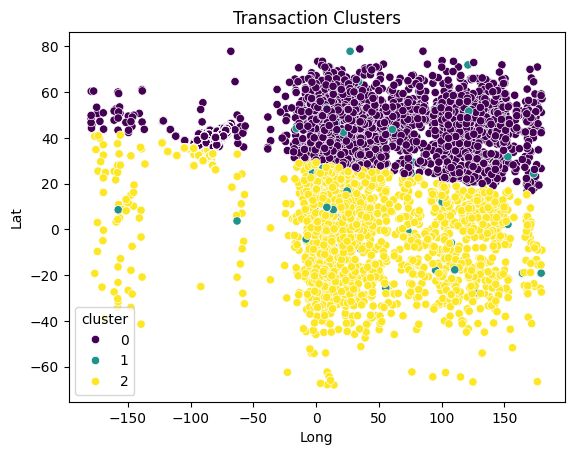

In [156]:
# 把聚类标签添加到原始DataFrame
data['cluster'] = kmeans.labels_

# 可视化聚类结果
sns.scatterplot(data=data, x='Long', y='Lat', hue='cluster', palette='viridis')
plt.title('Transaction Clusters')
plt.show()

In [157]:
# 计算每个点到其聚类中心的距离
clusters = kmeans.transform(features_scaled)
data['distance_to_center'] = clusters.min(axis=1)

# 设定阈值来定义何为“异常”
threshold = data['distance_to_center'].quantile(0.95)  # 例如，选择距离最远的5%作为异常
data['is_outlier'] = data['distance_to_center'] > threshold

In [158]:
# 查看异常点
outliers = data[data['is_outlier']]
outliers

,credit_card,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit,month,day,weekday,hour,cluster,distance_to_center,is_outlier
8,1003715054175576,95.20,-2.833179,34.745015,Houston,PA,15342,20000,9,17,3,19,0,3.839395,True
14,1003715054175576,146.75,69.475216,25.125749,Houston,PA,15342,20000,9,18,4,21,0,7.858904,True
113,1003715054175576,99.27,34.429275,24.659874,Houston,PA,15342,20000,9,8,1,16,2,6.194151,True
128,1003715054175576,87.77,102.032338,-32.343578,Houston,PA,15342,20000,10,25,6,0,2,14.810846,True
141,1003715054175576,53.31,-7.373733,-11.785999,Houston,PA,15342,20000,9,25,4,20,2,8.576236,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294360,9986135779184360,21.65,34.990643,47.021740,Houston,PA,15342,14000,9,2,2,22,0,5.549580,True
294391,9986135779184360,62.50,105.421314,39.849426,Houston,PA,15342,14000,9,27,6,21,0,8.968534,True
294504,9999757432802760,287.75,-82.418276,33.045349,Louisville,GA,30434,6000,8,26,2,22,2,1.954287,True
294553,9999757432802760,342.92,-82.413146,33.047057,Louisville,GA,30434,6000,10,9,4,21,2,2.362373,True


或者也可以考虑为0.99：

In [159]:
# 设定阈值来定义何为“异常”
threshold = data['distance_to_center'].quantile(0.99)  # 例如，选择距离最远的5%作为异常
data['is_outlier'] = data['distance_to_center'] > threshold

# 查看异常点
outliers = data[data['is_outlier']]
outliers

,credit_card,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit,month,day,weekday,hour,cluster,distance_to_center,is_outlier
14,1003715054175576,146.75,69.475216,25.125749,Houston,PA,15342,20000,9,18,4,21,0,7.858904,True
113,1003715054175576,99.27,34.429275,24.659874,Houston,PA,15342,20000,9,8,1,16,2,6.194151,True
128,1003715054175576,87.77,102.032338,-32.343578,Houston,PA,15342,20000,10,25,6,0,2,14.810846,True
141,1003715054175576,53.31,-7.373733,-11.785999,Houston,PA,15342,20000,9,25,4,20,2,8.576236,True
306,1013870087888817,40.52,110.386103,52.238635,Washington,NH,3280,15000,10,6,1,0,0,9.397314,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293359,9946917923319410,68.12,167.798144,50.545613,Washington,NH,3280,15000,9,3,3,21,0,12.157064,True
293735,9981251982982618,83.15,107.024289,5.903593,New York,NY,10001,18000,8,20,3,17,2,10.639296,True
293900,9981251982982618,116.08,123.446448,-0.895321,New York,NY,10001,18000,10,20,1,20,2,11.926994,True
294360,9986135779184360,21.65,34.990643,47.021740,Houston,PA,15342,14000,9,2,2,22,0,5.549580,True


**采用更多的特征和尝试不同的聚类结果**

In [160]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [163]:
# 假设df是你的DataFrame
features = data[['transaction_dollar_amount', 'Long', 'Lat', 'hour', 'weekday', 'credit_card_limit']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [166]:
sse = {}
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse[k] = kmeans.inertia_  # Inertia: Sum of distances of samples to their closest cluster center

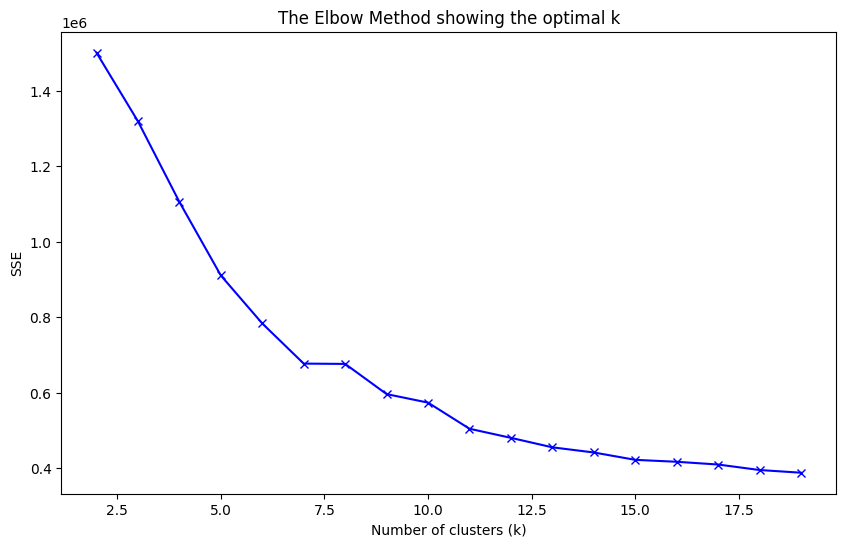

In [167]:
plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [168]:
# 选择7
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(features_scaled)

KMeans(n_clusters=7, random_state=42)

In [169]:
from sklearn.decomposition import PCA

# 降维到2D以便于可视化
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

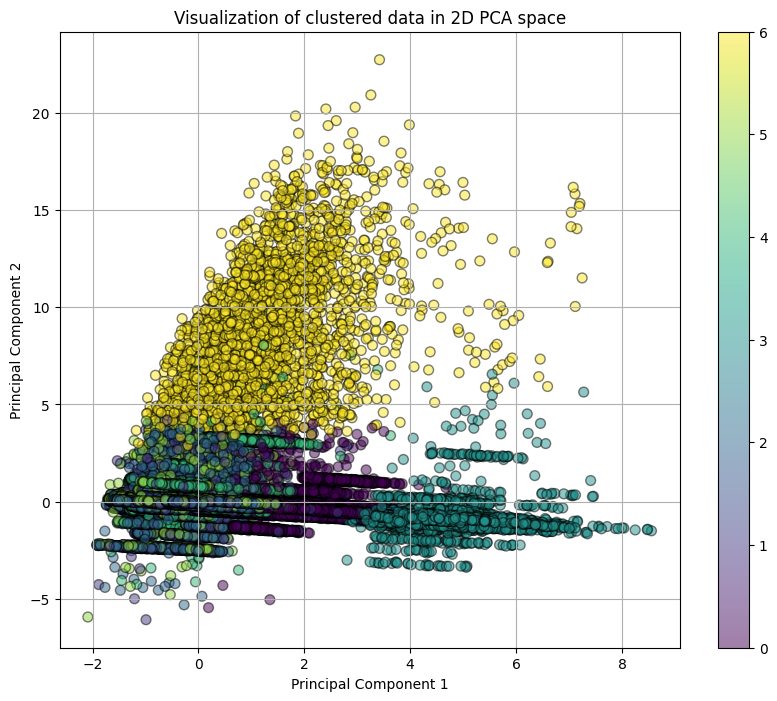

In [170]:
plt.figure(figsize=(10, 8))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.5)
plt.colorbar()
plt.title('Visualization of clustered data in 2D PCA space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

打印异常值：

In [172]:
# 计算每个点到其聚类中心的距离
distances = kmeans.transform(features_scaled)
# 取每个点到最近聚类中心的距离
min_distances = distances.min(axis=1)
data['distance_to_center'] = min_distances

分别采用95%和99%来进行异常值判断：

In [175]:
# 定义异常阈值
threshold_95 = np.percentile(data['distance_to_center'], 95)
threshold_99 = np.percentile(data['distance_to_center'], 99)

# 标记异常值
data['outlier_95'] = data['distance_to_center'] > threshold_95
data['outlier_99'] = data['distance_to_center'] > threshold_99

# 打印异常值
outliers_95 = data[data['outlier_95']]
outliers_99 = data[data['outlier_99']]

print("异常点（95%阈值）的数量：", len(outliers_95))
print("异常点（99%阈值）的数量：", len(outliers_99))

异常点（95%阈值）的数量： 14730
异常点（99%阈值）的数量： 2946


In [176]:
outliers_95

,credit_card,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit,month,day,weekday,hour,cluster,distance_to_center,is_outlier,outlier_95,outlier_99
8,1003715054175576,95.20,-2.833179,34.745015,Houston,PA,15342,20000,9,17,3,19,0,4.052773,False,True,False
113,1003715054175576,99.27,34.429275,24.659874,Houston,PA,15342,20000,9,8,1,16,2,2.854073,True,True,False
128,1003715054175576,87.77,102.032338,-32.343578,Houston,PA,15342,20000,10,25,6,0,2,9.480454,True,True,True
141,1003715054175576,53.31,-7.373733,-11.785999,Houston,PA,15342,20000,9,25,4,20,2,6.498275,True,True,True
152,1003715054175576,888.04,-80.231908,40.297183,Houston,PA,15342,20000,10,18,6,1,1,2.730214,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293929,9981251982982618,41.20,11.131851,38.071079,New York,NY,10001,18000,9,6,6,0,0,4.666401,False,True,True
294360,9986135779184360,21.65,34.990643,47.021740,Houston,PA,15342,14000,9,2,2,22,0,5.636957,True,True,True
294391,9986135779184360,62.50,105.421314,39.849426,Houston,PA,15342,14000,9,27,6,21,0,5.070611,True,True,True
294541,9999757432802760,142.28,-82.463788,32.996290,Louisville,GA,30434,6000,8,31,0,1,2,2.903619,False,True,False


In [177]:
outliers_99

,credit_card,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit,month,day,weekday,hour,cluster,distance_to_center,is_outlier,outlier_95,outlier_99
128,1003715054175576,87.77,102.032338,-32.343578,Houston,PA,15342,20000,10,25,6,0,2,9.480454,True,True,True
141,1003715054175576,53.31,-7.373733,-11.785999,Houston,PA,15342,20000,9,25,4,20,2,6.498275,True,True,True
259,1003715054175576,103.11,8.360145,36.188123,Houston,PA,15342,20000,10,29,3,23,0,4.510772,False,True,True
306,1013870087888817,40.52,110.386103,52.238635,Washington,NH,3280,15000,10,6,1,0,0,7.531586,True,True,True
495,1013870087888817,109.28,15.466472,51.695983,Washington,NH,3280,15000,10,15,3,18,0,4.942805,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293776,9981251982982618,82.09,3.183700,55.997719,New York,NY,10001,18000,10,10,5,22,0,4.765328,False,True,True
293828,9981251982982618,71.17,8.566971,52.557861,New York,NY,10001,18000,8,6,3,22,0,4.722553,False,True,True
293929,9981251982982618,41.20,11.131851,38.071079,New York,NY,10001,18000,9,6,6,0,0,4.666401,False,True,True
294360,9986135779184360,21.65,34.990643,47.021740,Houston,PA,15342,14000,9,2,2,22,0,5.636957,True,True,True


**Isolated Foret算法s**

In [178]:
from sklearn.ensemble import IsolationForest

# 实例化模型，可以根据需要调整参数，例如 contamination
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42, n_jobs=-1)
iso_forest.fit(features_scaled)

IsolationForest(n_jobs=-1, random_state=42)

In [180]:
# 预测数据点是正常点还是异常点
data['outlier'] = iso_forest.predict(features_scaled)
# 异常分数：越低的分数越可能是异常
data['scores'] = iso_forest.decision_function(features_scaled)

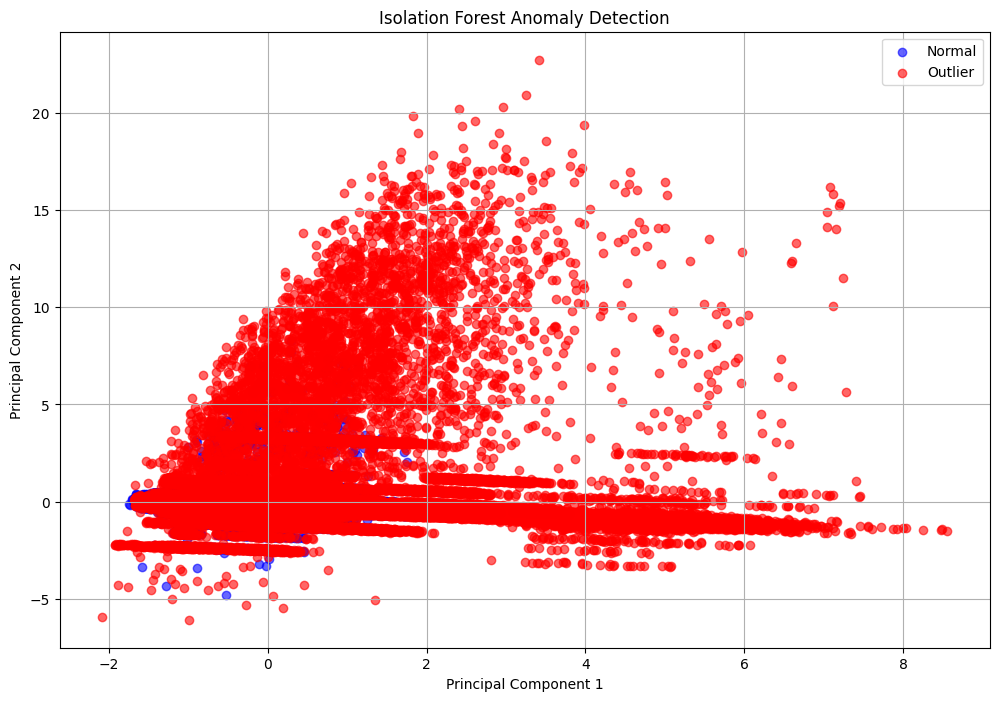

In [182]:
# 再次应用PCA以降维至二维用于可视化
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

plt.figure(figsize=(12, 8))
# 正常点
plt.scatter(features_pca[data['outlier'] == 1, 0], features_pca[data['outlier'] == 1, 1], c='blue', label='Normal', alpha=0.6)
# 异常点
plt.scatter(features_pca[data['outlier'] == -1, 0], features_pca[data['outlier'] == -1, 1], c='red', label='Outlier', alpha=0.6)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [183]:
# 查看被标记为异常的点的详细信息
outliers = data[data['outlier'] == -1]
outliers

,credit_card,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit,month,day,weekday,hour,cluster,distance_to_center,is_outlier,outlier_95,outlier_99,outlier,scores
14,1003715054175576,146.75,69.475216,25.125749,Houston,PA,15342,20000,9,18,4,21,0,2.045899,True,False,False,-1,-0.081751
37,1003715054175576,143.97,-80.172677,40.242183,Houston,PA,15342,20000,10,17,5,0,0,1.229994,False,False,False,-1,-0.005891
50,1003715054175576,118.84,-80.129378,40.264269,Houston,PA,15342,20000,9,1,1,0,0,1.699098,False,False,False,-1,-0.001754
84,1003715054175576,995.35,-80.126760,40.225626,Houston,PA,15342,20000,9,11,4,19,1,1.099840,False,False,False,-1,-0.084961
113,1003715054175576,99.27,34.429275,24.659874,Houston,PA,15342,20000,9,8,1,16,2,2.854073,True,True,False,-1,-0.088611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294580,9999757432802760,64.27,-82.370683,33.053340,Louisville,GA,30434,6000,9,10,3,1,2,1.989285,False,False,False,-1,-0.027721
294581,9999757432802760,141.36,-82.313309,32.973912,Louisville,GA,30434,6000,9,13,6,17,2,2.157205,False,False,False,-1,-0.012957
294582,9999757432802760,216.30,-82.443294,32.991054,Louisville,GA,30434,6000,10,23,4,20,2,1.917261,False,False,False,-1,-0.008773
294585,9999757432802760,77.54,-82.442130,32.949983,Louisville,GA,30434,6000,9,22,1,16,2,1.992578,False,False,False,-1,-0.014844
